# Part II - (Ford GoBike dataset analysis )
## by (Saad Maani)




## Introduction:


Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

On June 28, 2017, the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels on June 11, 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.
 

## Dataset Overview

The dataset includes 2342985 entries and 16 columns, a collection of Ford Gobike records from 2018 in San Francisco, California, this collection of data serves to study the usage behavior of their subscribers and casual customers in a way that could help Ford to offer a better user experience.

The used version of the dataset to communicate the findings is cleaned and augmented augmenting in order to conclude more information like the distance traveled trips, member age, ... that could help us to get more insights about how the user of Ford GoBike really uses the service. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2018_ford_gobike.csv')

## Question 1: 
Which day/hour of the week has more rides ?

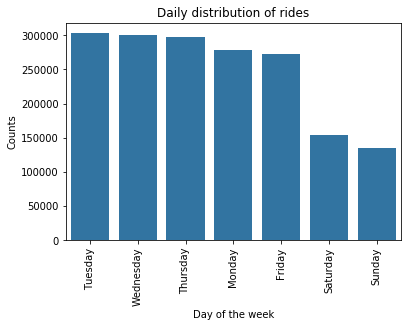

In [3]:
start_day_order = df['start_day'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_day', color=base_color, order = start_day_order )
plt.xticks(rotation=90)
plt.xlabel('Day of the week')
plt.ylabel('Counts')
plt.title('Daily distribution of rides');

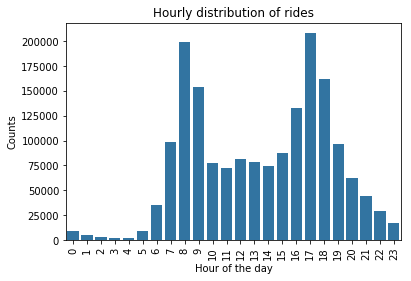

In [4]:
sb.countplot(data=df, x='start_hour', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Hour of the day')
plt.ylabel('Counts')
plt.title('Hourly distribution of rides');

## Insight:
We can clearly notice based on the two plots above that many bike rides are made from Monday to Friday at 8 am and 5 pm, this maybe related to the rouch hours when most of people tends to head to their work or university.

## Question 2: 
Which day/hour of the week per user type has more rides  ?

In [5]:
# We are to going to create some masks first:
Subscriber = df.user_type == 'Subscriber'
Customer = df.user_type == 'Customer'

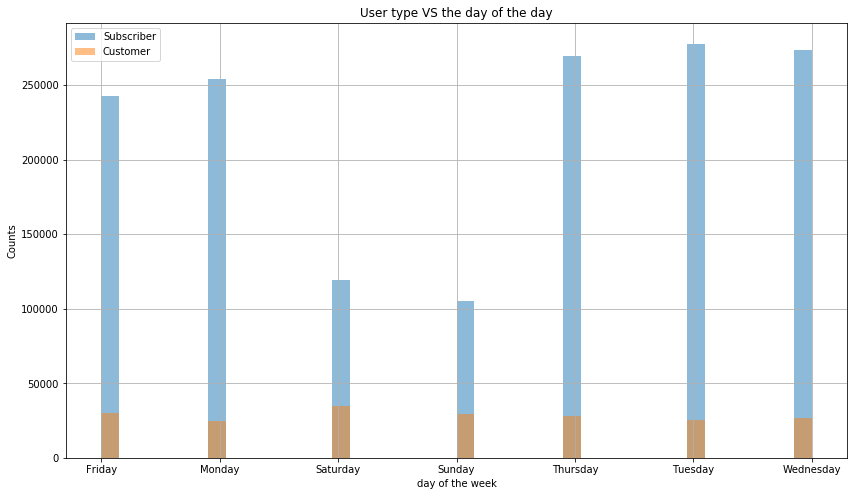

In [6]:
plt.figure(figsize=[14,8])
df.start_day[Subscriber].hist(alpha=0.5, bins=40, label='Subscriber')
df.start_day[Customer].hist(alpha=0.5, bins=40, label='Customer')
plt.title("User type VS the day of the day")
plt.xlabel('day of the week')
plt.ylabel("Counts")
plt.legend();


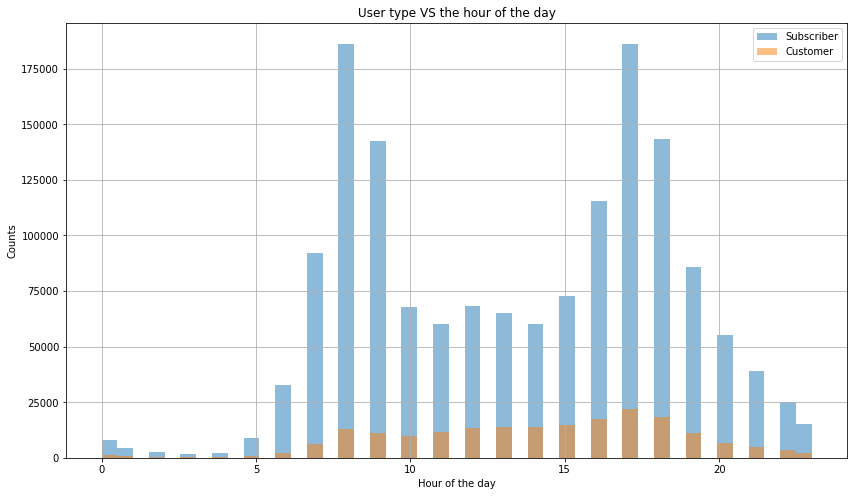

In [7]:
plt.figure(figsize=[14,8])
df.start_hour[Subscriber].hist(alpha=0.5, bins=45, label='Subscriber')
df.start_hour[Customer].hist(alpha=0.5, bins=45, label='Customer')
plt.title("User type VS the hour of the day")
plt.ylabel("Counts")
plt.xlabel('Hour of the day')
plt.legend();

# Insight:
After adding the user type variable into our previous plots, it shows now that most of the subscribers use the service in a considerable way during the rouch hours so it matchs our first findings, but the casual customer do not show this huge drop of number of rides off the rouch hours and the rides counts its pretty much well distributed.

## Question 3: 
What is the duration of each trip per member age made by user type ?


In [8]:
# We are to going to limit the age x-axis just to avoid a crowded one.
common_age = df[df['member_age'] < 60]
# We took just members that have less then 60 years old because 9th percentile of them have less then 6O.

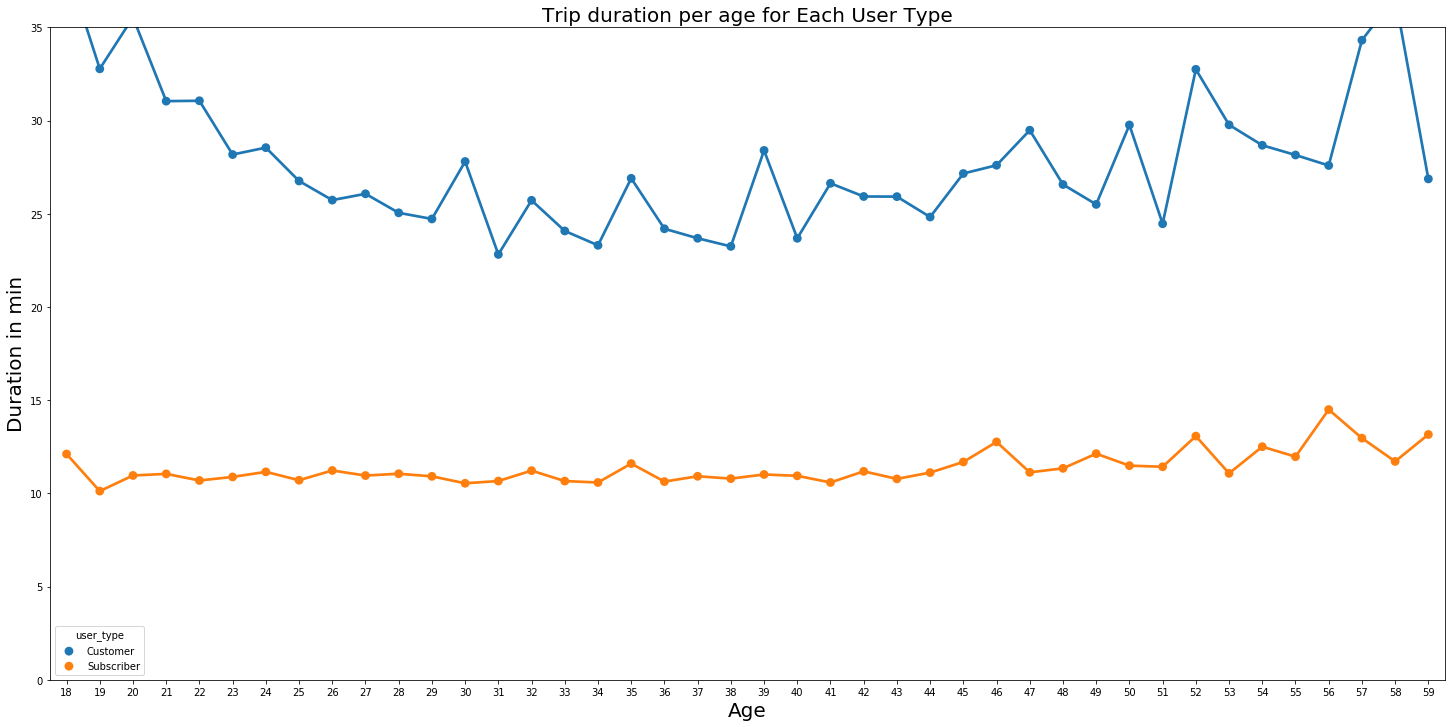

In [9]:
plt.figure(figsize=(25,12))
sb.pointplot(data=common_age, x='member_age', y='duration_min', hue = "user_type", ci=None)
plt.ylim(0,35)
plt.title("Trip duration per age for Each User Type", fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Duration in min', fontsize=20);
plt.show()




## Insights:
This viz has three variables (trip duration in min, member age, and the user type) and it clearly shows that subscribers aged from 18 to 60 (most of the people have an institutional time commitment in this age range)  are riding their bike 12 min per trip and it is steady, that goes too with our claim that the subscribers found the Ford GoBike very approximative so they use it as a medium to head and drive back from their work, on the contrary, the casual customers have a pretty much random usage because simply they use the service based on their humor or just as a matter of getting an experience so they don't include it in their daily routines.

## Conclusions:
After running the univariable analysis, we have found that most of the rides happened from Monday to Friday at 8 am and 5 pm that in some way related to institutions time, so after this insight we have done some more investigation in a  bivariable and multivariable level which lead us to conclude that most of the subscribers have a behavior that tends to use the Gobike service in a predictable way, like 12 min per ride and most of them have the age of going to the university or have a full-time job, too ride during the rush hours of the week when most people tend to go to their work or school. on the contrary, casual customers aim just for amusement or to get a bicycle experience so, their rides are longer and not related to the rush hours(most of them are on the weekend).
Unfortunately, we don't have a user-id that could help us track each individual behavior and maybe confirm or deny our hypothesis, the user_id could help us to study the subscribers in depth and see for example how many rides they took before joining the service and other questions.